# Arabic Audio Emotion Classifier

## Step1: Introduction

### 1- Use case

Emotion expression is an essential part of human interaction. The same text can hold different meanings when expressed with different emotions. Thus understanding the text alone is not enough for getting the meaning of an utterance. Acted and natural corpora have been used to detect emotions from speech. Many speech databases for different languages including English, German, Chinese, Japanese, Russian, Italian, Swedish and Spanish exist for modeling emotion recognition.

Arabic does not have an established natural audio emotion detector, so this is still a novel problem yet to be solved.

Emotion detectors for natural audio can be used in other applications like voice assistants, which can use the information derived from them to better serve the user depending on his/her mood. They can also be used in automated answering systems, which can help automatically determine the satisfaction of a customer calling a support line.

### 2- Justification of the use case choice

I am Tunisian (a country in the Maghreb region of North Africa): Arabic is my mother tongue(with French), I remain fascinated by the Arabic language and wanted to apply my knowledge in Machine Learning, Deep Learning, and Arabic to build an emotion classifier.

    
### 3- Dataset
The data set used in this project was obtained here https://www.kaggle.com/suso172/arabic-natural-audio-dataset (the normalized csv file was used) and consisted of acoustic features, much like other researchers used before. The features center around 25 wave properties and are as follows:

08 videos of live calls between an anchor and a human outside the studio were downloaded from online Arabic talk shows. Each video was then divided into turns: callers and receivers. To label each video, 18 listeners were asked to listen to each video and select whether they perceive a **"happy"**, **"angry"** or **"surprised"** emotion. Silence, laughs and noisy chunks were removed. Every chunk was then automatically divided into 1 sec speech units forming our final corpus composed of **1384** records.

25 **acoustic features**, also known as low-level descriptors, were extracted. These features are: intensity, zero crossing rates, MFCC 1-12 (Mel-frequency cepstral coefficients), F0 (Fundamental frequency) and F0 envelope, probability of voicing and, LSP frequency 0-7. On every feature 19 statistical functions were applied. The functions are: maximum, minimum, range, absolute position of maximum, absolute position of minimum, arithmetic of mean, Linear Regression1, Linear Regression2, Linear RegressionA, Linear RegressionQ, standard Deviation, kurtosis, skewness, quartiles 1, 2, 3 and, inter-quartile ranges 1-2, 2-3, 1-3. The delta coefficient for every LLD is also computed as an estimate of the first derivative hence leading to a total of nearly 900 features.

### 4- Data Quality Assessment

Although each of the 8 original audio samples were split into 1 second segments, every segment from the same original audio sample was classified to the **same emotion** by the listeners. I found this a bit odd, considering that it's rare when an individual, let along group of individuals, collectively have the same emotion through a series of spoken lines. After listening to the audio samples myself (**with my knowledge of Arabic**), I found that my suspicions were correct.

Additionally, the emotions happy, angry, and surprised were quite limited to describe the emotional spectrum of the lines spoken in the audio samples. I found more emotions like neutral among others in many of the spoken lines, yet they were still classified under 1 of the 3 emotions that the makers of the data set came up with.

Overall, I believe that there were some issues with the data set itself, but it was the first and only Arabic Natural Audio Data set, so I made due with what was available.

### 5- Proposed Approach: Models used

Given the very high success rate we usually get, using neural networks to build classifier, I decided to use Neural Network and oppose this model to traditional Machine Learning Algorithms: Logistic regression, Support Vector Machine and Random Forest classifiers.


### 6-  Importing the libraries and modules for the project

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

# Step2: Data Exploration & Visualizations

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


df = pd.read_csv(body)
df.head()


,name,Emotion,Type,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr12,F0env_sma_de_iqr23,F0env_sma_de_iqr13
0,V2_1 (1).wav',surprised,2,0.285714,0,0.285714,0.414894,0.0,0,0,...,0.092117,0.294281,0.771490,0.589508,0.117983,0.017167,0.027963,0.013516,0.067167,2.028063
1,V2_1 (2).wav',surprised,2,0.285714,0,0.285714,0.404255,0.0,0,0,...,0.031789,0.203679,0.565664,0.335376,0.120382,0.027347,0.045084,0.044086,0.085771,3.003057
2,V2_1 (3).wav',surprised,2,0.285714,0,0.285714,0.404255,0.0,0,0,...,0.097341,0.341096,0.657804,0.451624,0.107132,0.017167,0.028058,0.054392,0.067393,2.663894
3,V2_1 (4).wav',surprised,2,0.285714,0,0.285714,0.404255,0.0,0,0,...,0.055432,0.245241,0.516015,0.350308,0.121571,0.020762,0.048233,0.013987,0.107900,3.138976
4,V2_1 (5).wav',surprised,2,0.142857,0,0.142857,0.606383,0.0,0,0,...,0.033673,0.199890,0.519454,0.265627,0.119747,0.022636,0.045822,0.028148,0.097964,3.087905


#### Exploring Null values 

In [3]:
# We haven't null values
df.isnull().sum()

name                      0
Emotion                   0
Type                      0
pcm_intensity_sma_max     0
pcm_intensity_sma_min     0
                         ..
F0env_sma_de_quartile2    0
F0env_sma_de_quartile3    0
F0env_sma_de_iqr12        0
F0env_sma_de_iqr23        0
F0env_sma_de_iqr13        0
Length: 847, dtype: int64

#### Exploring the columns 

In [4]:
df.columns

Index(['name', 'Emotion ', 'Type', 'pcm_intensity_sma_max',
       'pcm_intensity_sma_min', 'pcm_intensity_sma_range',
       'pcm_intensity_sma_maxPos', 'pcm_intensity_sma_minPos',
       'pcm_intensity_sma_amean', 'pcm_intensity_sma_linregc1',
       ...
       'F0env_sma_de_linregerrQ', 'F0env_sma_de_stddev',
       'F0env_sma_de_skewness', 'F0env_sma_de_kurtosis',
       'F0env_sma_de_quartile1', 'F0env_sma_de_quartile2',
       'F0env_sma_de_quartile3', 'F0env_sma_de_iqr12', 'F0env_sma_de_iqr23',
       'F0env_sma_de_iqr13'],
      dtype='object', length=847)

####  Unique values of emotions (classes) & Visualization 

In [5]:
df['Emotion '].unique()

array(['surprised', 'angry', 'happy'], dtype=object)

In [6]:
#Unbalanced classes but it is okay

df["Emotion "].value_counts()

angry        741
happy        505
surprised    137
Name: Emotion , dtype: int64

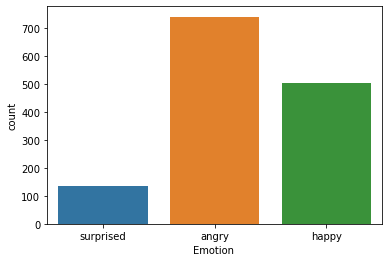

In [7]:
sns.countplot(df['Emotion ']);

#### Exploring Highest correlations between features & Visualization

In [8]:
# Exploring the Correlation with the target column (Emotion or Type because Type is the numerical column of Emotion)
df.corr()['Type'][df.corr()['Type']>= 0.5].sort_values()

lspFreq_sma7_quartile3    0.601185
lspFreq_sma7_linregc2     0.635693
lspFreq_sma7_amean        0.642398
lspFreq_sma7_quartile2    0.647954
lspFreq_sma7_quartile1    0.657701
Type                      1.000000
Name: Type, dtype: float64

In [9]:
cols = df.corr()['Type'][df.corr()['Type']>= 0.5].index
cols = cols.tolist()+['Type']
cols

['Type',
 'lspFreq_sma7_amean',
 'lspFreq_sma7_linregc2',
 'lspFreq_sma7_quartile1',
 'lspFreq_sma7_quartile2',
 'lspFreq_sma7_quartile3',
 'Type']

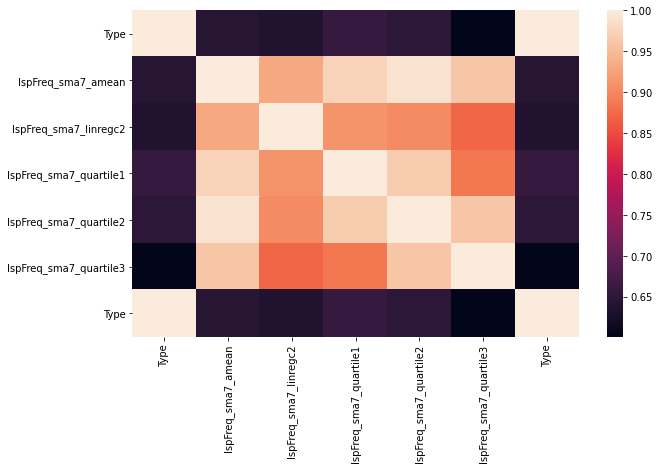

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr()[cols].loc[cols]);

In [11]:
df.corr()['Type'][df.corr()['Type']<= -0.5].sort_values()

lspFreq_sma2_min           -0.608350
lspFreq_sma2_linregc2      -0.578047
lspFreq_sma3_linregc2      -0.545548
lspFreq_sma3_amean         -0.535165
lspFreq_sma2_amean         -0.526998
lspFreq_sma3_min           -0.526670
pcm_fftMag_mfcc_sma2_min   -0.525881
lspFreq_sma2_quartile2     -0.521779
Name: Type, dtype: float64

In [12]:
cols_two= df.corr()['Type'][df.corr()['Type']<= -0.5].index
cols_two= cols_two.tolist()+['Type']
cols_two

['pcm_fftMag_mfcc_sma2_min',
 'lspFreq_sma2_min',
 'lspFreq_sma2_amean',
 'lspFreq_sma2_linregc2',
 'lspFreq_sma2_quartile2',
 'lspFreq_sma3_min',
 'lspFreq_sma3_amean',
 'lspFreq_sma3_linregc2',
 'Type']

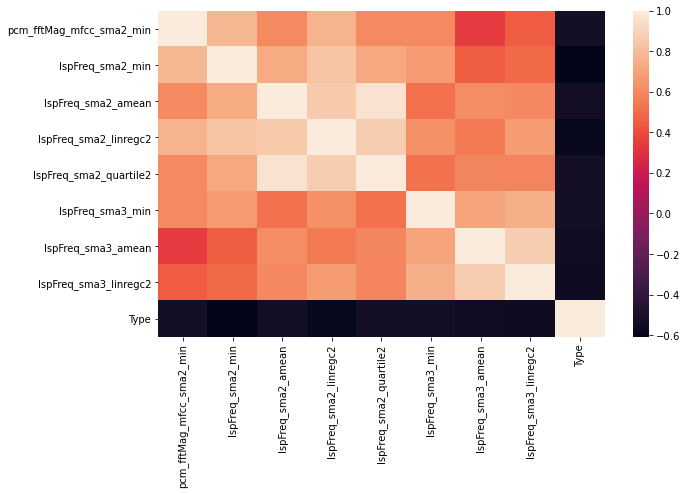

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr()[cols_two].loc[cols_two]);

# Step3: Feature engineering

In [14]:
df['Type'].unique()

array([2, 3, 1])

#### 1. Create the dictionary of correspondent classes

In [16]:

df_happy= df[df['Emotion ']=='happy']
class_happy= df_happy['Type'].iloc[0]

df_angry= df[df['Emotion ']=='angry']
class_angry = df_angry['Type'].iloc[0]

df_surprised = df[df['Emotion ']== "surprised"]
class_surprised =df_surprised['Type'].iloc[0]

In [17]:
dict_classes= {class_happy: "happy" ,class_angry: "angry",class_surprised: "surprised"}
dict_classes

{1: 'happy', 3: 'angry', 2: 'surprised'}

#### 2. Applying Principal component Analysis PCA to get informative artificial features

In [18]:
X= df.drop(['name','Type','Emotion '],axis=1).values
y= df['Type'].values

In [19]:
model_pca= PCA(n_components= 50)
model_pca.fit(X)

PCA(n_components=50)

In [20]:
X2= model_pca.transform(X)

In [21]:
print(X.shape, X2.shape)

(1383, 844) (1383, 50)


# Step4. Splitting the data

In [22]:
#traing sets: X_train, y_train & test_sets: X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X2,y, test_size=0.2)

In [23]:
X_train.shape

(1106, 50)

In [24]:
X_test.shape

(277, 50)

In [25]:
y_train.shape

(1106,)

In [26]:
y_test.shape

(277,)

In [27]:
X_train.shape

(1106, 50)

#### 2. Labels Transformation (only for the Neural Network Algorithm) not for Traditional ML Algorithms

In [28]:
y_train_nn = to_categorical(y_train)[:,1:]
y_test_nn = to_categorical(y_test)[:,1:]

In [29]:
y_train_nn[0:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [30]:
#Little Verification: perfect!
y_train[0:5]

array([3, 2, 3, 1, 1])

In [31]:
y_test_nn[0:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [32]:
#Little Verification: perfect!
y_test[0:5]

array([3, 3, 3, 1, 3])

# Step5: Classification with Traditional Machine Learning Algorithms & Evaluation

#### 1. Machine Learning Model_1: Logistic Regression

##### Creating and Training the model

In [33]:
pipeline = make_pipeline(LogisticRegression())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('logisticregression', LogisticRegression())])

##### Predictions & Evaluation (on the test set)

In [34]:
y_pred= pipeline.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.89      0.97      0.93        79
           2       0.74      0.54      0.62        37
           3       0.94      0.95      0.94       161

    accuracy                           0.90       277
   macro avg       0.85      0.82      0.83       277
weighted avg       0.90      0.90      0.90       277



In [35]:
dict_classes

{1: 'happy', 3: 'angry', 2: 'surprised'}

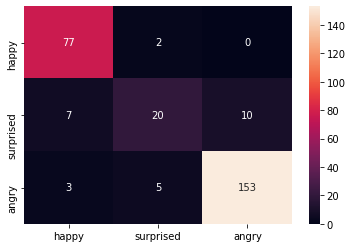

In [36]:
labels=["happy","surprised","angry"]
cm_one= pd.DataFrame(confusion_matrix(y_test,y_pred), index=labels, columns= labels)
sns.heatmap(cm_one, annot = True, fmt = 'g');

#### 2. Machine Learning Model_2: Random Forest with GridSearch

##### Creating and Training the model

In [37]:
grid = {'n_estimators': [10, 50, 100, 200,300]}
clf_two= GridSearchCV(RandomForestClassifier(),grid)
clf_two.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200, 300]})

In [38]:
clf_two.best_params_

{'n_estimators': 100}

##### Predictions & Evaluation (on the test set)

In [39]:
y_pred_two= clf_two.predict(X_test)
print(classification_report(y_test,y_pred_two))

              precision    recall  f1-score   support

           1       0.87      0.87      0.87        79
           2       1.00      0.27      0.43        37
           3       0.84      0.98      0.90       161

    accuracy                           0.85       277
   macro avg       0.90      0.71      0.73       277
weighted avg       0.87      0.85      0.83       277



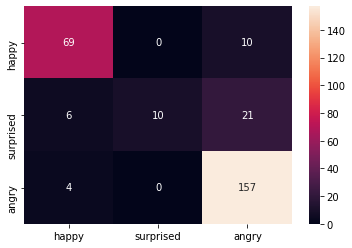

In [40]:
labels=["happy","surprised","angry"]
cm_two= pd.DataFrame(confusion_matrix(y_test,y_pred_two), index=labels, columns= labels)
sns.heatmap(cm_two, annot = True, fmt = 'g');

#### 3. Machine Learning Model_3: Support Vector Machine

##### Creating and Training the model

In [104]:
grid = {'C': [1, 5, 50], 'gamma': [0.05, 0.1, 0.5, 1, 5]}
clf_three= GridSearchCV(SVC(),grid)
clf_three.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 50], 'gamma': [0.05, 0.1, 0.5, 1, 5]})

In [105]:
print(clf_three.best_params_)

{'C': 5, 'gamma': 0.05}


##### Predictions & Evaluation (on the test set)

In [106]:
y_pred_three = clf_three.predict(X_test)
print(classification_report(y_test,y_pred_three))

              precision    recall  f1-score   support

           1       0.94      0.96      0.95        79
           2       0.86      0.68      0.76        37
           3       0.95      0.99      0.97       161

    accuracy                           0.94       277
   macro avg       0.92      0.88      0.89       277
weighted avg       0.94      0.94      0.94       277



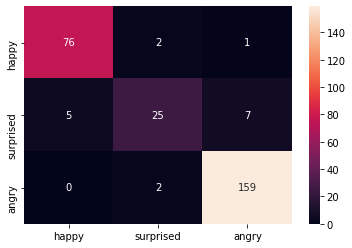

In [107]:
labels=["happy","surprised","angry"]
cm_three= pd.DataFrame(confusion_matrix(y_test,y_pred_three), index=labels, columns= labels)
sns.heatmap(cm_three, annot = True, fmt = 'g');

# Step6: Classification with Deep Neural Network & Evaluation

In [56]:
model = Sequential()
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=3,activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

In [57]:
model.fit(x=X_train, 
          y=y_train_nn, 
          epochs=25,
          batch_size=64,
          validation_data=(X_test, y_test_nn), verbose=1
          )

Train on 1106 samples, validate on 277 samples
Epoch 1/25
1106/1106 [==============================] - 22s 20ms/sample - loss: 0.9083 - accuracy: 0.5805 - val_loss: 0.8722 - val_accuracy: 0.7256
Epoch 2/25
1106/1106 [==============================] - 21s 19ms/sample - loss: 0.7401 - accuracy: 0.7785 - val_loss: 0.7372 - val_accuracy: 0.7798
Epoch 3/25
1106/1106 [==============================] - 22s 20ms/sample - loss: 0.5800 - accuracy: 0.8373 - val_loss: 0.5966 - val_accuracy: 0.8159
Epoch 4/25
1106/1106 [==============================] - 21s 19ms/sample - loss: 0.4430 - accuracy: 0.8599 - val_loss: 0.4762 - val_accuracy: 0.8375
Epoch 5/25
1106/1106 [==============================] - 23s 20ms/sample - loss: 0.3408 - accuracy: 0.8825 - val_loss: 0.3996 - val_accuracy: 0.8700
Epoch 6/25
1106/1106 [==============================] - 21s 19ms/sample - loss: 0.2734 - accuracy: 0.9005 - val_loss: 0.3434 - val_accuracy: 0.8989
Epoch 7/25
1106/1106 [==============================] - 22s 20ms/

In [58]:
model_loss = pd.DataFrame(model.history.history)

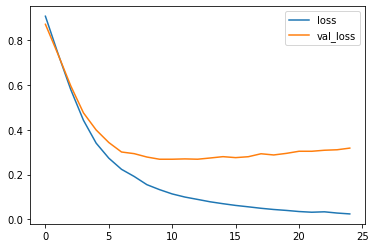

In [59]:
model_loss[['loss','val_loss']].plot();

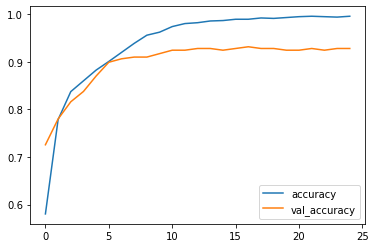

In [60]:
model_loss[['accuracy','val_accuracy']].plot();

#### Trying this strategy: adding Dropout layers

In [63]:
model_two = Sequential()
model_two.add(Dense(units=64,activation='relu'))
model_two.add(Dense(units=32,activation='relu'))
model_two.add(Dropout(0.2))
model.add(Dense(units=16, activation='relu'))
model_two.add(Dense(units=3,activation='softmax'))
model_two.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

In [64]:
model_two.fit(x=X_train, 
          y=y_train_nn, 
          epochs=30,
          batch_size=64,
          validation_data=(X_test, y_test_nn), verbose=1
          )

Train on 1106 samples, validate on 277 samples
Epoch 1/30
1106/1106 [==============================] - 19s 17ms/sample - loss: 0.9504 - accuracy: 0.5371 - val_loss: 0.8310 - val_accuracy: 0.6498
Epoch 2/30
1106/1106 [==============================] - 19s 18ms/sample - loss: 0.7382 - accuracy: 0.7061 - val_loss: 0.7098 - val_accuracy: 0.7617
Epoch 3/30
1106/1106 [==============================] - 18s 17ms/sample - loss: 0.6208 - accuracy: 0.7984 - val_loss: 0.6112 - val_accuracy: 0.8159
Epoch 4/30
1106/1106 [==============================] - 19s 17ms/sample - loss: 0.5097 - accuracy: 0.8345 - val_loss: 0.5241 - val_accuracy: 0.8484
Epoch 5/30
1106/1106 [==============================] - 18s 16ms/sample - loss: 0.4316 - accuracy: 0.8644 - val_loss: 0.4557 - val_accuracy: 0.8592
Epoch 6/30
1106/1106 [==============================] - 17s 15ms/sample - loss: 0.3716 - accuracy: 0.8716 - val_loss: 0.4082 - val_accuracy: 0.8700
Epoch 7/30
1106/1106 [==============================] - 17s 16ms/

In [65]:
model_two_loss = pd.DataFrame(model.history.history)

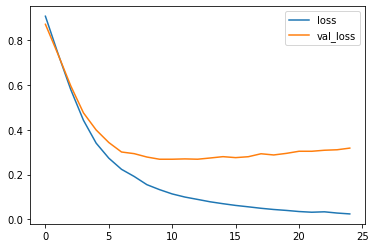

In [66]:
model_two_loss[['loss','val_loss']].plot();

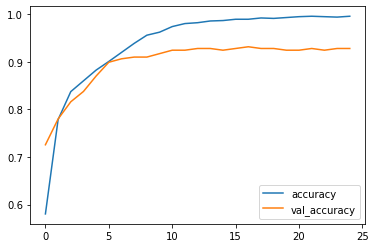

In [67]:
model_two_loss[['accuracy','val_accuracy']].plot();

#### Predictions & Evaluation (on the test set)

In [102]:
model.evaluate(X_test,y_test_nn)

277/277 [==============================] - 4s 14ms/sample - loss: 0.3185 - accuracy: 0.9278


[0.31849887283915645, 0.92779785]

In [103]:
model_two.evaluate(X_test,y_test_nn)

277/277 [==============================] - 4s 15ms/sample - loss: 0.2881 - accuracy: 0.9350


[0.2880661674247322, 0.93501806]

# Step8: Conclusion

Traditional machine learning algorithms provide acceptable accuracy on many use cases. But, a lot of times the accuracy we are building might not be satisfactory. Therefore, we are always looking for better ways to improve the performance of our models Deep Learning Neural Networks. There are many techniques available wwith Neural Networks that could help us achieve that (to avoid overfitting using Dropout strategy for example an so on...).In our exemple of audio arabic emotion classifier, we succeeded in achieving high performance and metrics we used prove this high performance (f1 score, precision, recall, accuracy)